In [3]:
import pandas as pd
import numpy as np
import sklearn
import cv2
import mediapipe as mp

In [28]:
def record(image):
    face_mesh = mp.solutions.face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    listin=[]
    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]

    results = face_mesh.process(image)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                listin.append(i.landmark[j].x)
                listin.append(i.landmark[j].y)
    return listin

In [14]:
def get_input():

    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]
    cap = cv2.VideoCapture(0)
    face_detection = mp.solutions.face_detection.FaceDetection()
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    t_some=[]

    success, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame_rgb)

    if results.detections:
        for detection in results.detections:
            bounding_box = detection.location_data.relative_bounding_box
            x = int(bounding_box.xmin * frame.shape[1])
            y = int(bounding_box.ymin * frame.shape[0])
            w = int(bounding_box.width * frame.shape[1])
            h = int(bounding_box.height * frame.shape[0])
    else:
        print("bounding box detection failed")

    crop_img = frame[y-30:y+h+10, x-20:x+w+20]

    rgb_frame = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                t_some.append(i.landmark[j].x)
                t_some.append(i.landmark[j].y)
    else:
        print("feature detection failed")
                
    cap.release()
    return t_some, crop_img

In [11]:
df=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\degree regression\\tilt_train_crop_some.csv')
print(df)
df_test=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\degree regression\\tilt_test_crop_some.csv')
print(df_test)

             1         2         3         4         5         6         7  \
0     0.481610  0.683786  0.475982  0.557125  0.479672  0.591459  0.473955   
1     0.489505  0.692930  0.479061  0.567046  0.484571  0.601489  0.475893   
2     0.486030  0.701164  0.476479  0.568937  0.481233  0.604081  0.473550   
3     0.497281  0.699237  0.487668  0.572799  0.492114  0.607000  0.484876   
4     0.502578  0.692685  0.493922  0.569694  0.498071  0.601300  0.491234   
...        ...       ...       ...       ...       ...       ...       ...   
1004  0.327473  0.717206  0.431942  0.618442  0.404968  0.641046  0.461220   
1005  0.335078  0.721749  0.438473  0.621954  0.410816  0.643871  0.466384   
1006  0.328318  0.721121  0.429230  0.618661  0.403743  0.642866  0.456833   
1007  0.342337  0.733648  0.440494  0.631702  0.415965  0.654689  0.467548   
1008  0.339761  0.721301  0.441503  0.622967  0.414601  0.644006  0.469260   

             8         9        10  ...       256       257    

In [4]:
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [5]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [6]:
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [21]:
df_test=df_test.dropna().reset_index(drop=True)
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

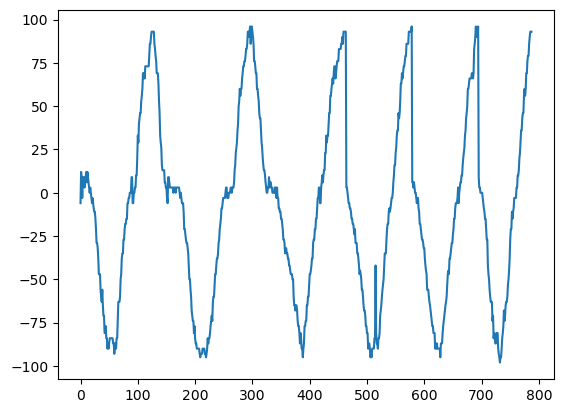

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(len(df['1'].tolist())),df['degree'].tolist())
plt.show()

In [12]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
print(X)
print(Y)

X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values
print(X_test)
print(Y_test)

[[0.48160985 0.68378562 0.47598168 ... 0.38887408 0.74573189 0.311185  ]
 [0.48950472 0.69293016 0.47906148 ... 0.3964842  0.73985505 0.31798244]
 [0.48603049 0.70116353 0.47647855 ... 0.39764875 0.73940021 0.321015  ]
 ...
 [0.32831776 0.72112078 0.42923042 ... 0.7953589  0.85794514 0.64603811]
 [0.34233737 0.73364806 0.44049382 ... 0.79183257 0.87038279 0.64622939]
 [0.33976093 0.72130054 0.44150299 ... 0.76773238 0.86675918 0.62839115]]
[  0.90938045   0.86805145   1.76239102 ... -41.28471089 -40.48601154
 -39.52263127]
[[0.48547119 0.66715676 0.48623338 ... 0.42098945 0.73629999 0.3171505 ]
 [0.47818977 0.66964799 0.47467381 ... 0.43220115 0.72405809 0.3271848 ]
 [0.47412682 0.66184384 0.47023547 ... 0.42196074 0.73081452 0.31071737]
 ...
 [0.34338885 0.6941818  0.45982647 ... 0.79971033 0.86569643 0.62492657]
 [0.34484324 0.70488489 0.46020255 ... 0.80451071 0.86885196 0.63165474]
 [0.34044212 0.6936841  0.45265669 ... 0.77508104 0.86612636 0.61159021]]
[  0.          -3.2397003  

In [22]:
#normalized
X = df.iloc[:, :-1].values
Y_nn = df.iloc[:, -1].values
train_min=np.min(Y_nn)
train_max=np.max(Y_nn)
Y = (Y_nn - train_min) / (train_max - train_min)
print(X)
print(Y)


X_test = df_test.iloc[:, :-1].values
Y_nn = df_test.iloc[:, -1].values
Y_test = (Y_nn - train_min) / (train_max - train_min)
print(X_test)
print(Y_test)

[[0.50110382 0.67438459 0.49292609 ... 0.37840536 0.76160562 0.2809774 ]
 [0.50475985 0.67455876 0.49686825 ... 0.37934429 0.76552236 0.28757784]
 [0.50490254 0.68125218 0.49669766 ... 0.38391972 0.7677052  0.29021108]
 ...
 [0.07330012 0.63928253 0.01835552 ... 0.47849849 0.45793089 0.32780674]
 [0.07330012 0.63928253 0.01835552 ... 0.47849849 0.45793089 0.32780674]
 [0.07330012 0.63928253 0.01835552 ... 0.47849849 0.45793089 0.32780674]]
[0.4742268  0.56701031 0.55154639 0.48969072 0.53608247 0.55154639
 0.55154639 0.52061856 0.53608247 0.55154639 0.56701031 0.53608247
 0.56701031 0.55154639 0.53608247 0.52061856 0.50515464 0.52061856
 0.50515464 0.48969072 0.4742268  0.48969072 0.4742268  0.45876289
 0.44845361 0.44845361 0.42783505 0.39690722 0.3556701  0.3556701
 0.34020619 0.30927835 0.2628866  0.2628866  0.2628866  0.21649485
 0.19587629 0.18041237 0.21649485 0.17010309 0.13917526 0.13917526
 0.08762887 0.08762887 0.10824742 0.07216495 0.07216495 0.04123711
 0.05670103 0.0412371

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, Y)

LinearRegression()

In [14]:
y_pred = regressor.predict(X_test)
print(np.concatenate((Y_test.reshape(len(Y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[  0.           1.13491079]
 [ -3.2397003   -0.71576514]
 [  0.          -0.83339818]
 [ -3.2397003   -2.36117739]
 [ -4.48460601  -0.92396808]
 [ -2.20259816  -0.79621096]
 [ -2.24574257  -2.95338225]
 [ -2.20259816  -1.06974196]
 [ -2.24574257  -2.32560399]
 [ -3.36646066  -4.14974274]
 [ -3.36646066  -4.71575025]
 [ -1.16913933  -3.42548873]
 [ -1.16913933  -2.89677581]
 [ -3.36646066  -1.55736927]
 [ -2.38594403  -2.82534962]
 [ -1.14576284  -3.68252432]
 [ -1.16913933  -4.67752591]
 [  0.          -2.42518292]
 [  0.          -3.06834091]
 [  2.33730586  -2.08296679]
 [  1.16913933  -1.1363359 ]
 [  1.19348942  -2.38085395]
 [  0.          -0.46355868]
 [  1.16913933  -2.39486535]
 [  0.          -1.90527514]
 [  1.19348942  -1.35689665]
 [  1.19348942  -1.87830073]
 [  0.          -1.89707644]
 [ -1.21887524  -2.47332995]
 [  0.          -1.51654943]
 [  1.16913933   0.06334993]
 [  1.19348942  -0.3484681 ]
 [  1.21887524   1.53607411]
 [  2.48955292   2.32929966]
 [  3.81407483

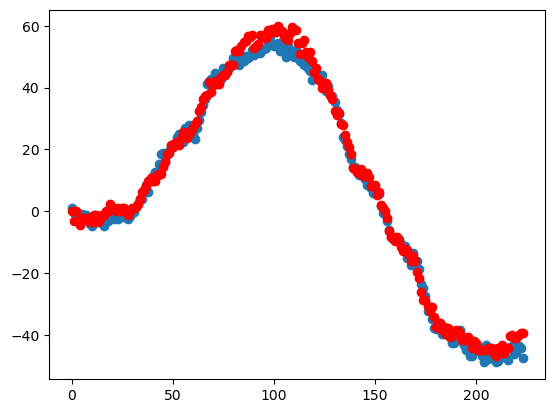

In [15]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), Y_test, color='red')
plt.show()

In [9]:
#normalized

y_pred=(y_pred*(train_max - train_min)) + train_min
Y_test=(Y_test*(train_max - train_min)) + train_min
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), Y_test, color='red')
plt.show()

NameError: name 'train_max' is not defined

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2) 

mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

mse = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mse)

R-squared: 0.9922048714147091
Mean Squared Error: 8.913673233655159
Mean Absolute Error: 2.330513803160518


In [33]:
#tilt
listin,frame=get_input()
if len(listin)==0:
    raise Exception("input is empty")
y_pred = regressor.predict([listin])
print("Predicted degree:",y_pred)
print("Input (",len(listin),"):")
print(listin)
cv2.imshow('Face Detection', cv2.flip(frame, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\RS7un\anaconda3\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Predicted degree: [-92.35734092]
Input:
[0.9145306348800659, 0.6631107330322266, 0.9590104818344116, 0.5417454838752747, 0.8905396461486816, 0.5894731879234314, 0.9619652032852173, 0.5078856348991394, 0.9373509287834167, 0.46942025423049927, 0.856402575969696, 0.37266430258750916, 0.5986014604568481, 0.35965025424957275, 0.8040899038314819, 0.11400917172431946, 0.8906567692756653, 0.7067030072212219, 0.8932826519012451, 0.713374137878418, 0.8976141214370728, 0.7645456790924072, 0.9388900399208069, 0.5632919669151306, 0.32376769185066223, 0.2456243634223938, 0.5786409378051758, 0.35056179761886597, 0.889038622379303, 0.6630711555480957, 0.8479491472244263, 0.6853386759757996, 0.8148090839385986, 0.7069435715675354, 0.9371747374534607, 0.5109113454818726, 0.8149330019950867, 0.5538988709449768, 0.41506290435791016, 0.1811104416847229, 0.26274925470352173, 0.759859025478363, 0.7582322359085083, 0.7425551414489746, 0.798262357711792, 0.572816789150238, 0.6359592080116272, 0.109427303075790